In [18]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# 빈도가 1~5000까지의 데이터 가져오기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 5000)

# 데이터 전처리(클래스가 긍정 부정 두개 뿐이라 원핫 인코딩 작업이 필요없음. categorical)
# maxlen = 단어수를 100개로 맞춰라
x_trian = sequence.pad_sequences(x_train, maxlen = 100)
x_test = sequence.pad_sequences(x_test, maxlen = 100)

# 모델 설정하기
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding = 'valid', activation = 'relu', strides = 1))
# Conv1D = Conv2D의 개념을 1차원으로 옮긴것./ 컨볼루션 층, 배열도 1차원 
model.add(MaxPooling1D(pool_size = 4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                

In [21]:
# 데이터 형태 확인하기
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(25000,) (25000,)
(25000, 100) (25000,)


In [22]:
# 첫번째 데이터 확인하기
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [25]:
# 모델 컴파일하기
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 모델 실행하기
history = model.fit(x_trian, y_train, batch_size = 100, epochs = 5, validation_data = (x_test, y_test))

# 테스트 정확도 출력
print("\n Test Accuracy : %.4f" % (model.evaluate(x_test, y_test)[1]))

Epoch 1/5
250/250 [==============================] - 14s 50ms/step - loss: 0.5558 - accuracy: 0.6807 - val_loss: 0.3675 - val_accuracy: 0.8379
Epoch 2/5
250/250 [==============================] - 12s 48ms/step - loss: 0.2921 - accuracy: 0.8798 - val_loss: 0.3333 - val_accuracy: 0.8552
Epoch 3/5
250/250 [==============================] - 12s 48ms/step - loss: 0.2425 - accuracy: 0.8996 - val_loss: 0.3251 - val_accuracy: 0.8600
Epoch 4/5
250/250 [==============================] - 12s 48ms/step - loss: 0.2000 - accuracy: 0.9234 - val_loss: 0.3279 - val_accuracy: 0.8557
Epoch 5/5
782/782 [==============================] - 5s 5ms/step - loss: 0.3494 - accuracy: 0.8544

 Test Accuracy : 0.8544


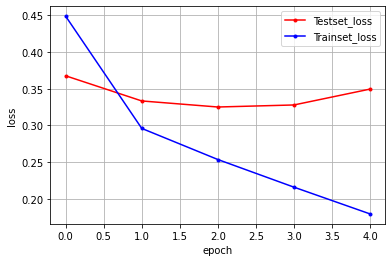

In [28]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현하기
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = "red", label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = "blue", label = 'Trainset_loss')

# 그래프에 그리드 주고 레이블 표시하기
plt.legend(loc = 'upper right')
plt.grid() # 격자
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()